In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
from modules import *

In [3]:
# loading observation data
dirname = './data/Equator_Data_with_2_degree_Ls_mesh/MY32Data_Ls2.nc'
data = Dataset(dirname, 'r')

t = data.variables['Temp'][:][:,::2].mean(axis=1)
ls = data.variables['L_s'][:]
p = data.variables['Pressure'][:]
np.where((p>40)&(p<60))

# loading model data
dirname = glob.glob('./data/*_reduced/*_full_TP.nc')
print(dirname)

ls_list = np.zeros((4,222))
t_list = np.zeros((4,222))
for i, dataname in enumerate(tqdm(dirname)):
    data = Dataset(dataname, 'r')

    t2 = data.variables['T'][:][:,:,17:20].mean(axis=3).mean(axis=2)
    ls2 = data.variables['LS'][:]
    p2 = data.variables['P'][:,:,17:20].mean(axis=2)

    t2 = martians_year(ls2, t2) [:,25:30].mean(axis=1)
    t2 = t2.reshape((223,24)).mean(axis=1) [1:]
    p2 = martians_year(ls2, p2)
    ls2 = martians_year(ls2, ls2) [::24] [1:]
    
    
    ls_list[i] = ls2
    t_list[i] = t2
    

t2.shape

['./data/r14p1dustL40_reduced/r14p1dustL40_full_TP.nc', './data/r14p1_reduced/r14p1_full_TP.nc', './data/r14p5_reduced/r14p5_full_TP.nc']


100%|██████████| 3/3 [01:29<00:00, 29.82s/it]


(222,)

(4, 222)

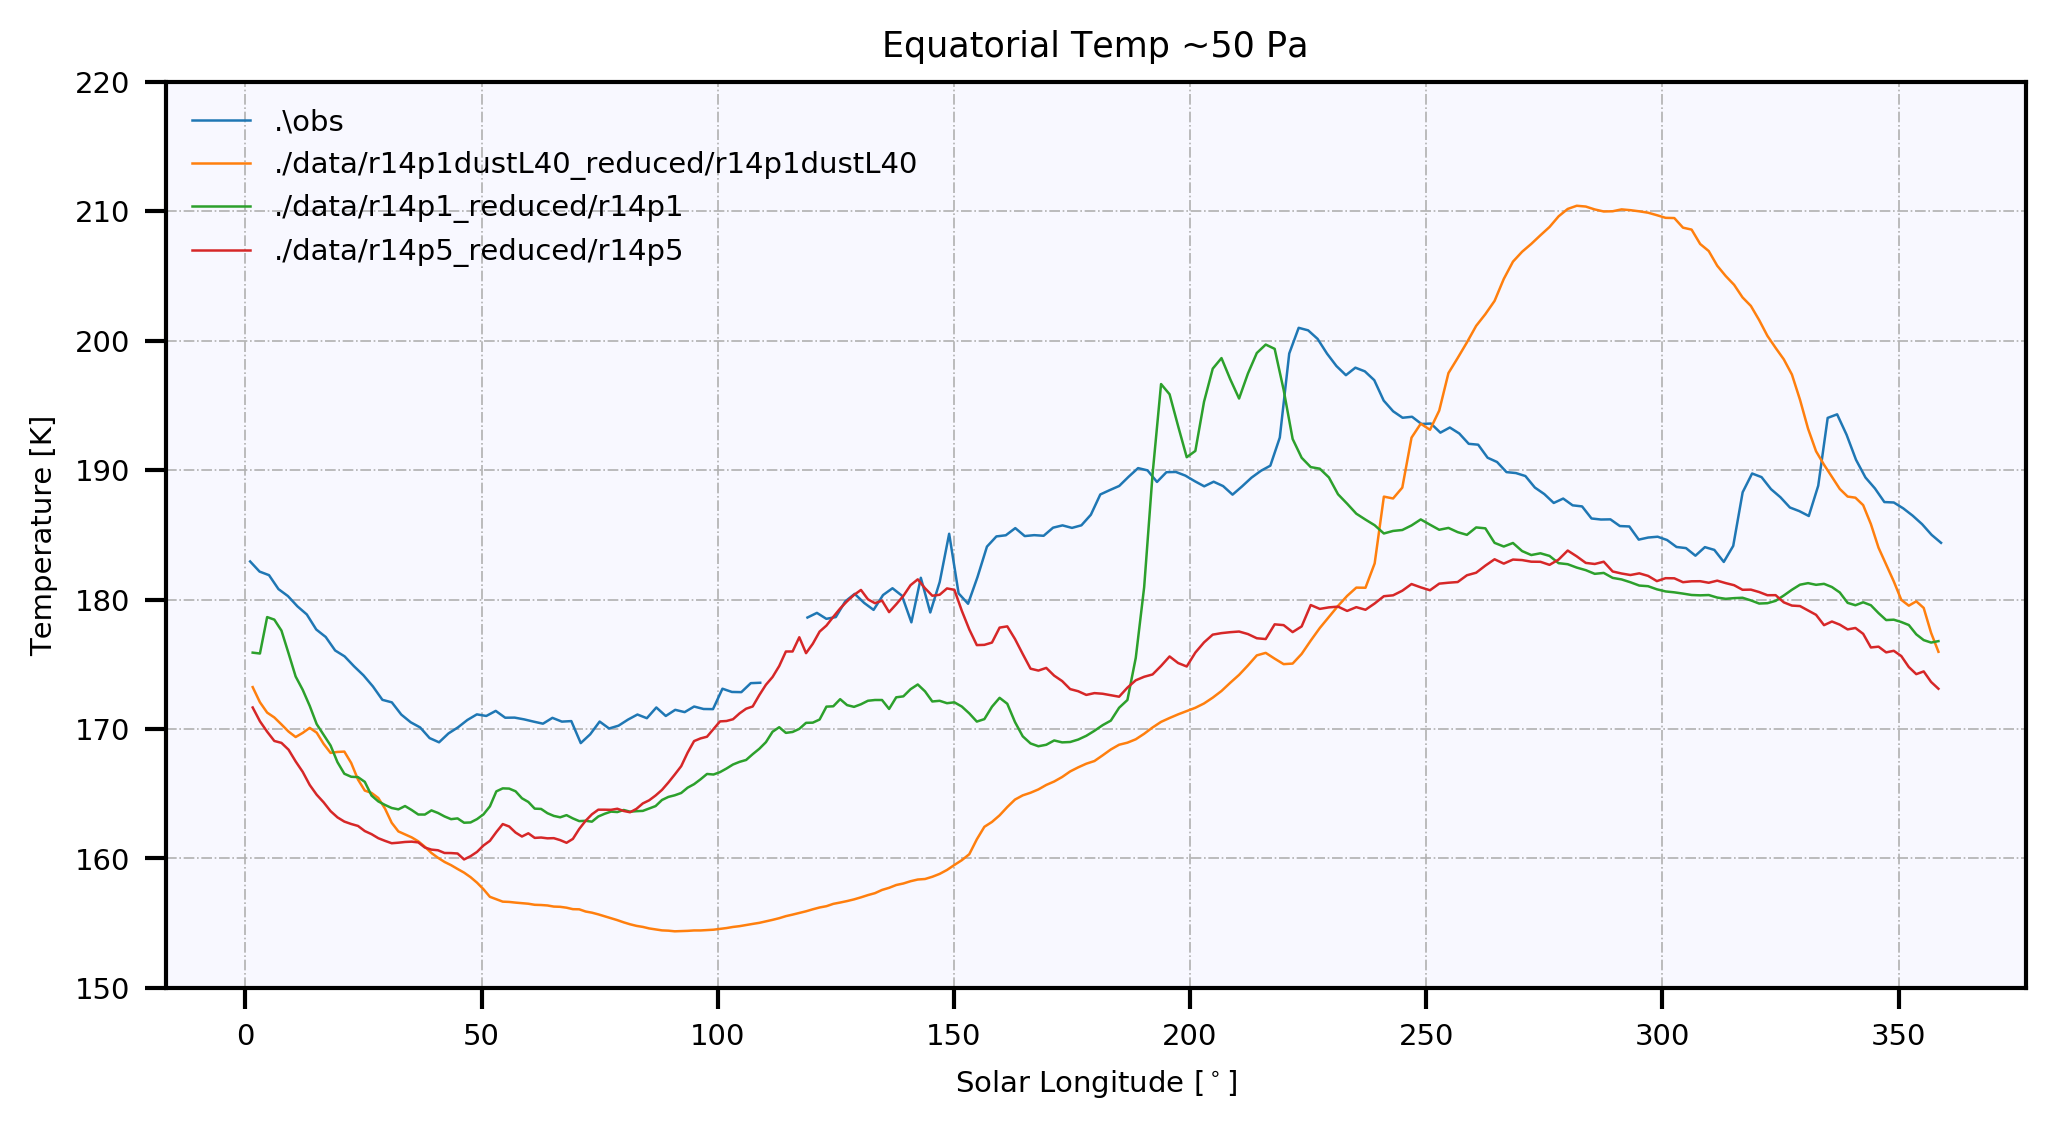

In [8]:
figure(figsize=(8 ,4))
plot(ls, t[:,28:31].mean(axis=1), label = '.\obs')
for i in np.arange(len(dirname)):
    plot(ls_list[i], t_list[i], label = dirname[i].replace('_full_TP.nc', ''))
ylim([150,220])
title('Equatorial Temp ~50 Pa')
ylabel('Temperature [K]')
xlabel('Solar Longitude [$^\circ$]')
legend()
plt.savefig('model_comparion.pdf', format='pdf', bbox_inches='tight', dpi=400)

t_list.shape